In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df_L = pd.read_csv('df_clean.csv')
df_L.drop('Unnamed: 0', axis =1, inplace=True)

In [3]:
df_L['Time'] = np.arange(len(df_L.index))
df_L = df_L[['date','price','Time']]
df_L.set_index('date', inplace=True)

C:\Users\dicod\AppData\Local\Temp\ipykernel_7864\1318357898.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


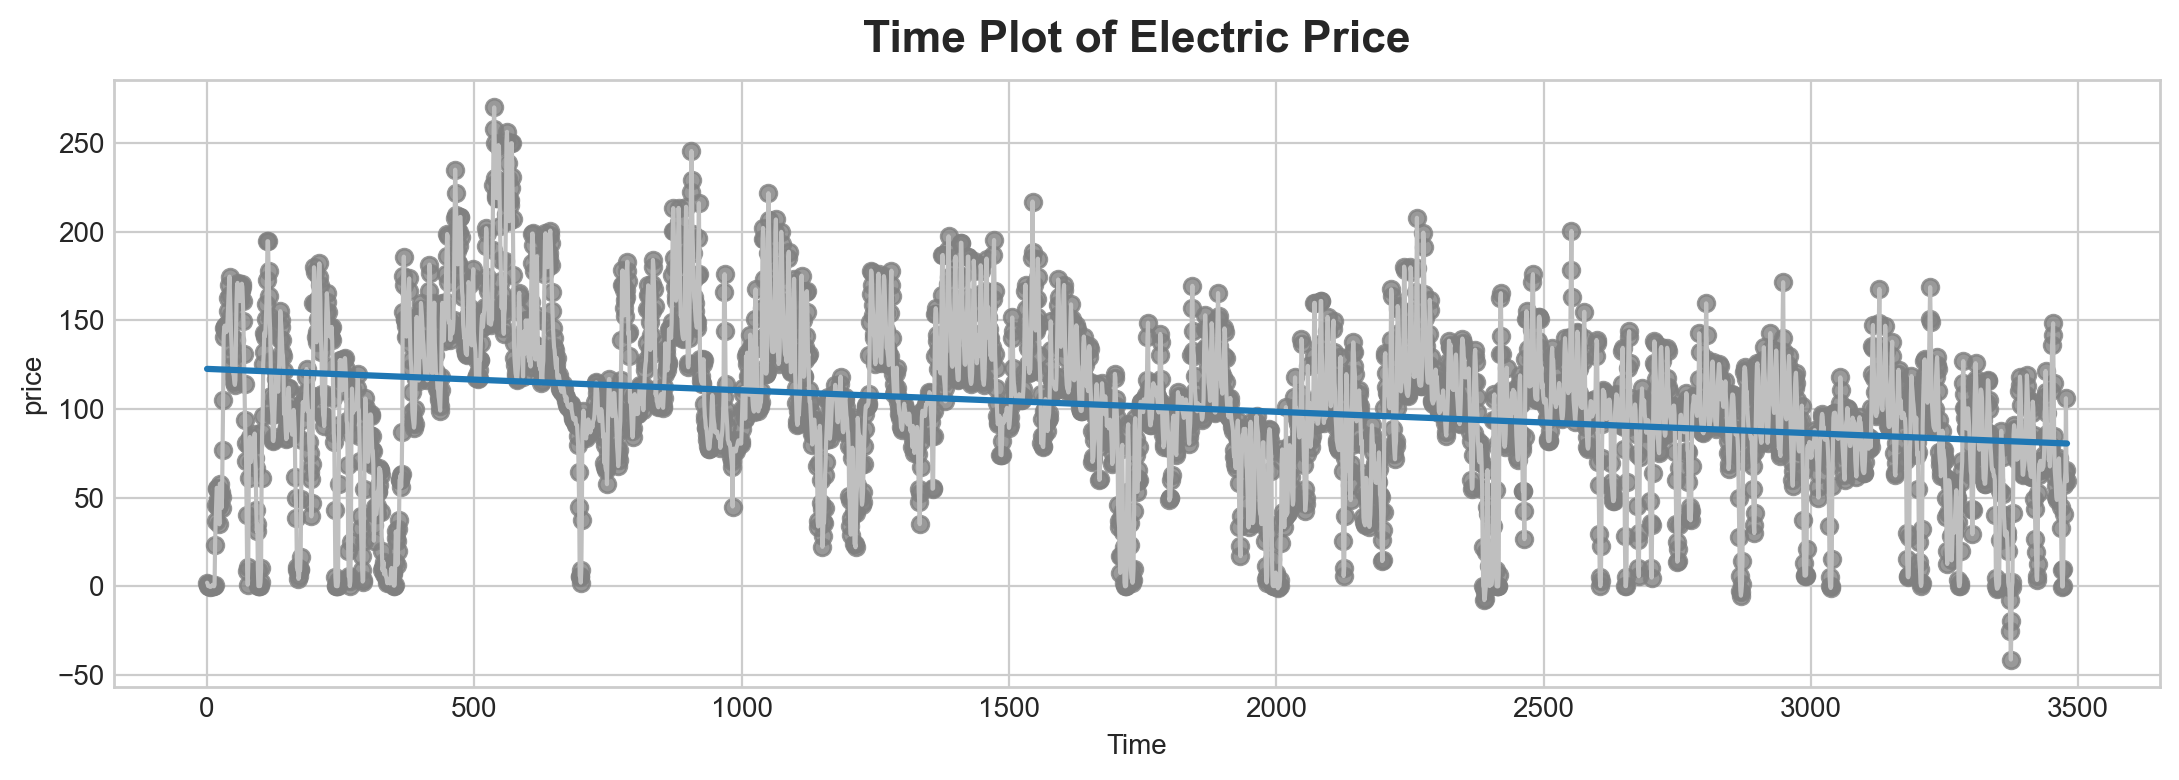

In [4]:
# let's see our actual data first!
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'price', data=df_L, color='0.75')
ax = sns.regplot(x='Time', y='price', data=df_L, ci=None, scatter_kws=dict(color='0.5'))
ax.set_title('Time Plot of Electric Price');

In [5]:
# Lag features¶
# To make a lag feature we shift the observations of the target series so that they appear to have occured later in time.
# Here we've created a 24-step lag feature, though shifting by multiple steps is possible too.
df_L['Lag_24'] = df_L['price'].shift(24)
df_L_lag = df_L.reindex(columns=['price', 'Lag_24'])

df_L_lag.head()

,price,Lag_24
date,,
01.01.2023 00:00,2.01,NaN
01.01.2023 01:00,1.38,NaN
01.01.2023 02:00,0.09,NaN
01.01.2023 03:00,0.08,NaN
01.01.2023 04:00,0.05,NaN


#### Why we use lag in timeseries data?

Time series analysis uses lags because the value of a time series at a given point in time can be dependent on the values of the series at previous points in time. In other words, the behavior of a time series at time t can be influenced by its values at times t-1, t-2, and so on.

A lag is simply a time shift of a time series by a certain number of time periods. For example, the first-order lag of a time series at time t is its value at time t-1. By analyzing the relationship between a time series and its lagged values, we can identify patterns, trends, and other characteristics of the series.

Lagging a time series can be useful for a variety of purposes in time series analysis, such as:

Prediction: By using lagged values of a time series as input features, we can build models to forecast future values of the series.

Autocorrelation analysis: Lagging a time series allows us to calculate its autocorrelation function (ACF), which measures the correlation between the series and its lagged values. The ACF can be used to identify the presence of trends, seasonal patterns, and other forms of correlation in the series.

Stationarity testing: A stationary time series is one whose statistical properties (such as mean and variance) do not change over time. By lagging a time series and calculating its ACF, we can test whether the series is stationary or not.

Overall, lags play an important role in time series analysis by allowing us to analyze the temporal dependencies between a series and its past values, and to extract useful information for forecasting and analysis.

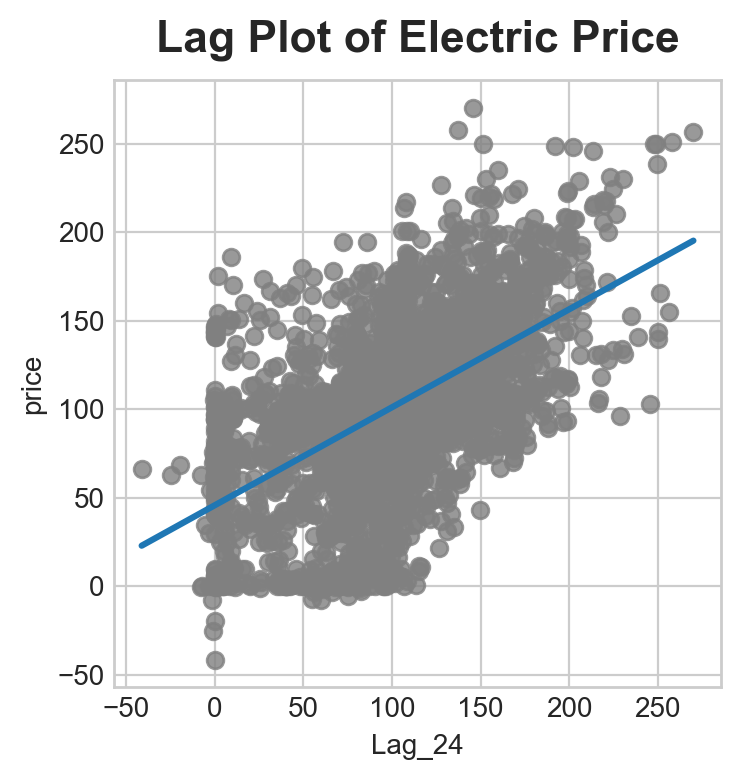

In [6]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_24', y='price', data=df_L, ci=None, scatter_kws=dict(color='0.5'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Electric Price');

Text(0.5, 1.0, 'Time Plot of Electric Price_Linear Prediction')

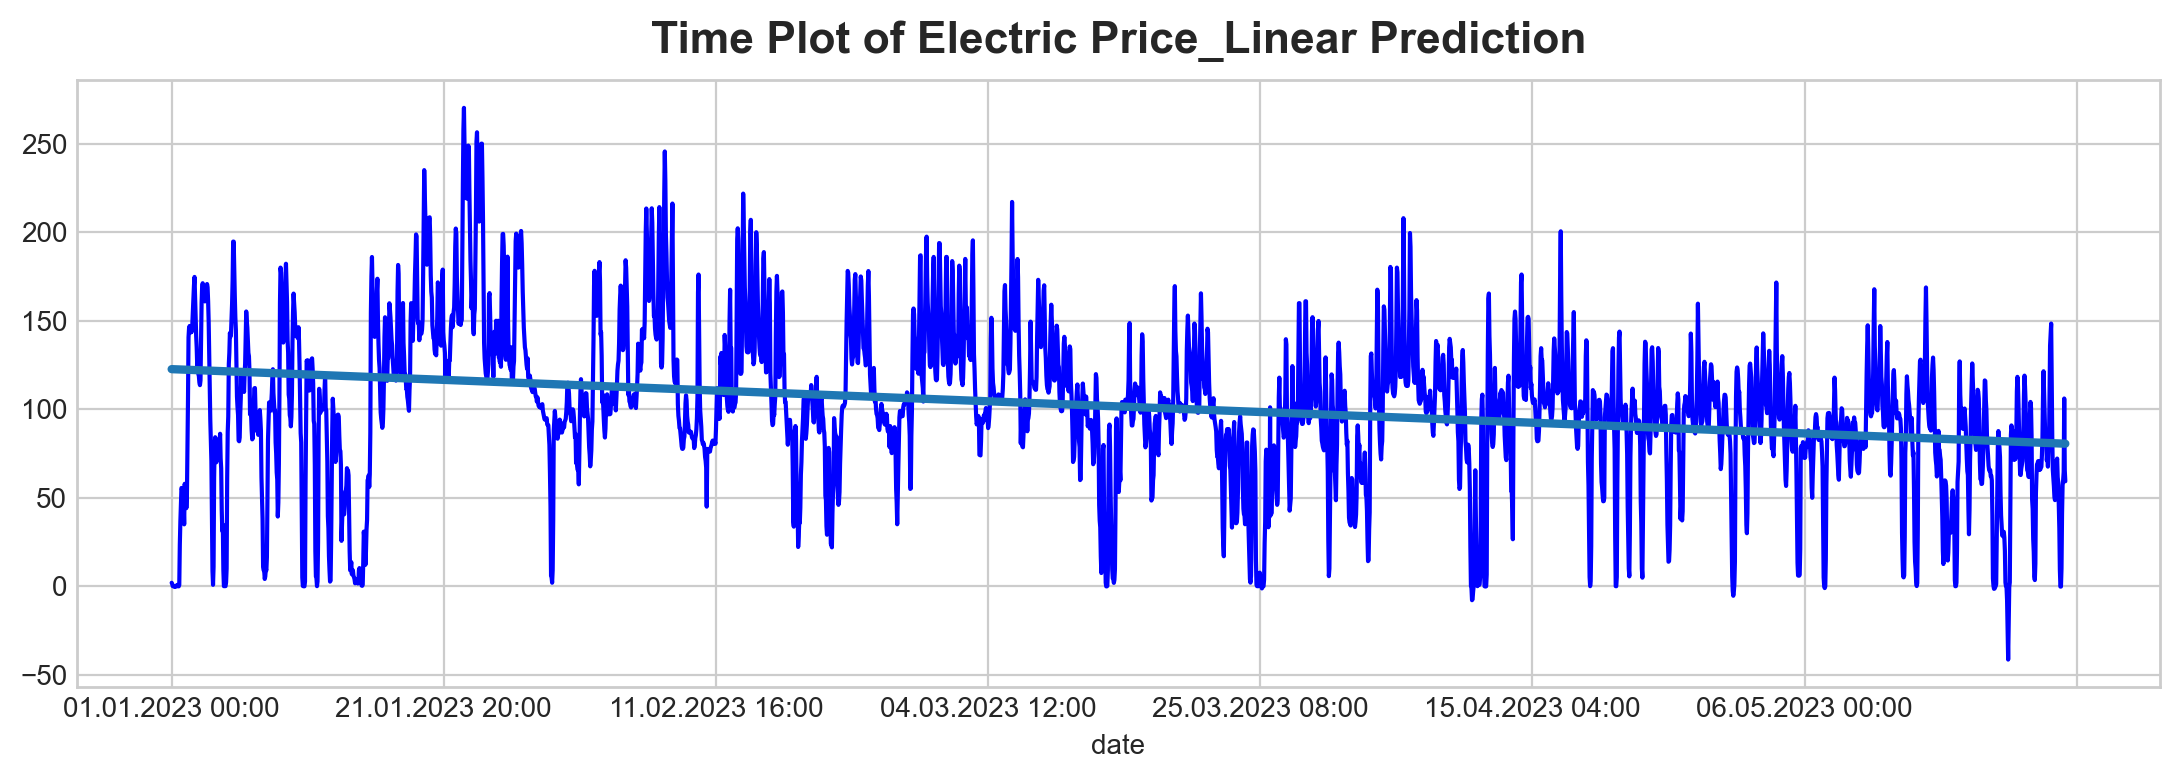

In [7]:
# Training data
X = df_L.loc[:, ['Time']]  # features
y = df_L.loc[:, 'price']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

plot_params = {'color': 'blue', 'linestyle': '-'}

ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Electric Price_Linear Prediction')

In [8]:
X = df_L.loc[:, ['Lag_24']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df_L.loc[:, 'price']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

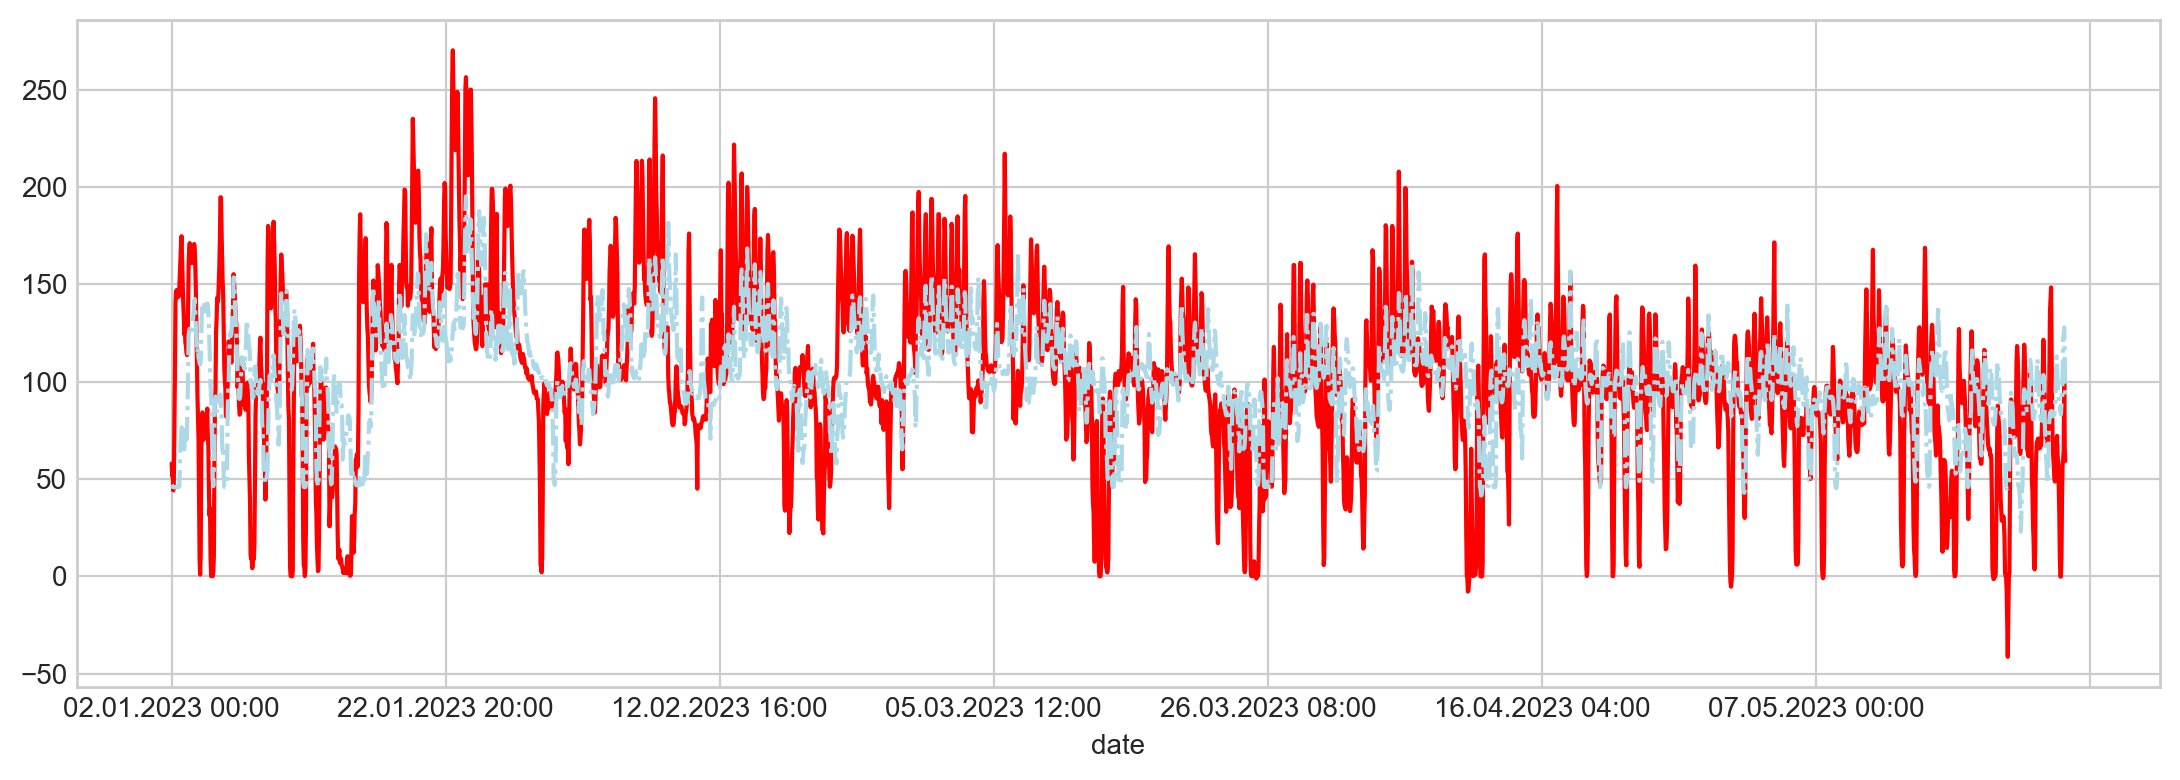

In [9]:
plot_params_actu = {'color': 'red', 'linestyle': '-'}
plot_params_pred = {'color': 'lightblue', 'linestyle': 'dashdot'}

ax = y.plot(**plot_params_actu)
ax = y_pred.plot(**plot_params_pred)

In [10]:
squared_diff = (y_pred - y) ** 2
    
# Calculate the mean squared error
mse = np.mean(squared_diff)
rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 36.06137708860526
